In [3]:
import numpy as np
from scipy.fftpack import ifft
from numpy.polynomial.legendre import leggauss
import matplotlib.pyplot as plt
eps = np.finfo(float).eps

In [4]:
def clencurt(n1):
    n = n1 - 1
    C = np.zeros((n1,2))
    k = 2*(1+np.arange(np.floor(n/2)))
    # Compute weights --> integral of Tn(x)
    C[::2,0] = 2/np.hstack((1, 1-k*k))
    C[1,1] = -n
    V = np.vstack((C,np.flipud(C[1:n,:])))
    # Real part of inverse FFT ~ Cosine transform
    F = np.real(ifft(V, n=None, axis=0))
    x = F[:n1,1]
    w = np.hstack((F[0,0],2*F[1:n,0],F[n,0]))
    return x, w

In [6]:
x,w = clencurt(11)
print(x)

[-1.         -0.95105652 -0.80901699 -0.58778525 -0.30901699  0.
  0.30901699  0.58778525  0.80901699  0.95105652  1.        ]


In [10]:
N = 11
k = np.arange(N)
#print(k)
xk = np.cos((2*k-1)*np.pi/(2*N))
print(xk)

[ 9.89821442e-01  9.89821442e-01  9.09631995e-01  7.55749574e-01
  5.40640817e-01  2.81732557e-01  2.83276945e-16 -2.81732557e-01
 -5.40640817e-01 -7.55749574e-01 -9.09631995e-01]


In [11]:
def transint(x,w,a,b):
    x = (b-a)*(x + (a+b)/(b-a))/2
    w = (b-a)*w/2
    return x,w

In [12]:
xt,wt = transint(x,w,-2,3)
print(xt)

[-2.         -1.87764129 -1.52254249 -0.96946313 -0.27254249  0.5
  1.27254249  1.96946313  2.52254249  2.87764129  3.        ]


In [19]:
def f(x):
    return x*np.log(x)

In [27]:
def mygauss(N,f,a=-1,b=1):
    x, w = np.polynomial.legendre.leggauss(N)
    xt,wt = transint(x,w,a,b)
    return wt.dot(f(xt))

In [31]:
def myclencurt(N,f,a=-1,b=1):
    x,w = clencurt(N)
    xt,wt = transint(x,w,a,b)
    return wt.dot(f(xt))

In [34]:
a = 1
b = 2
N = 5
print(mygauss(N,f,a,b))
print(myclencurt(N,f,a,b))

0.6362943606071265
0.636293660376966


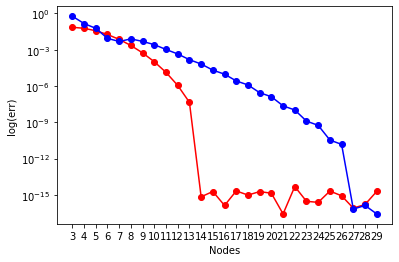

In [44]:
p = lambda x: x**26
test = 2/27
errg = []
errc = []
Nvec = np.arange(3,30)
for N in Nvec:
    G = mygauss(N,p)
    C = myclencurt(N,p)
    errg.append(np.fabs(G-test))
    errc.append(np.fabs(C-test))
plt.semilogy(Nvec,errg,'ro-',Nvec,errc,'bo-')
plt.xlabel('Nodes')
plt.ylabel('log(err)')
plt.xticks(Nvec);